# Ensemble learning

Ensemble learning is a supervised machine-learning technique that combines multiple models to build a more powerful and robust model. The idea is that by combining the strengths of multiple models, we can create a model that is more robust and less likely to overfit the data. It can be used for both classification and regression tasks.

Ensemble learning techniques can be categorized in three ways:
* Bagging (Bootstrap Aggregating)
* Boosting
* Stacking (Stacked Generalization)

# Random forest algorithm

Random forest is a commonly-used machine learning algorithm that combines the output of multiple decision trees to reach a single result.

Decision trees can be prone to problems, such as bias and overfitting. However, when multiple decision trees form an ensemble in the random forest algorithm, they predict more accurate results, particularly when the individual trees are uncorrelated with each other.

**Bagging** is an ensemble learning model, where multiple models are trained on different subsets of the training data. Each subset is sampled with replacement and prediction is made by averaging the prediction of the weak models for regression problem and considering majority vote for classification problem.

1. **Bagging** - sampling with Replacement: for each tree in the forest, a random sample of the training data is taken with replacement. This means that some instances may be repeated while others may not be included at all.
Because each tree is trained on a different subset of the data, the trees can learn different patterns, which contributes to the overall robustness of the model.
2. **Random Feature Selection** - when splitting a node in each tree, a random subset of features is selected instead of considering all available features. This is typically controlled by a parameter called **max_features**.
This random selection of features ensures that the trees are less correlated with one another, which reduces overfitting and increases the generalization ability of the ensemble.
3. Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a **majority vote** — i.e. the most frequent categorical variable—will yield the predicted class.

In [1]:
import pandas as pd
data = pd.read_csv("../content/heart_small.csv")

In [2]:
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
data.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [5]:
data['heart disease'].value_counts(normalize=True)

heart disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64

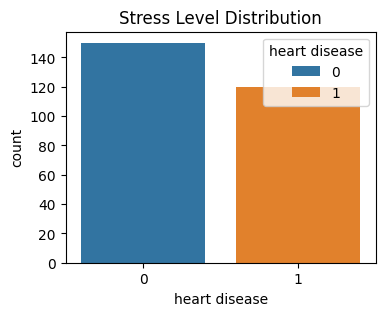

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.countplot(x= "heart disease",data= data, hue="heart disease")
plt.title('Stress Level Distribution')
plt.show()

In [7]:
columns=data.columns

In [8]:
columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [9]:
first=columns[0:4]

In [10]:
first

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

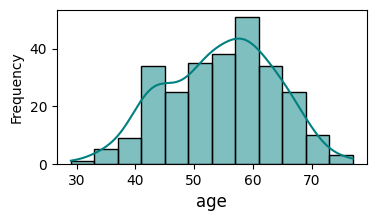

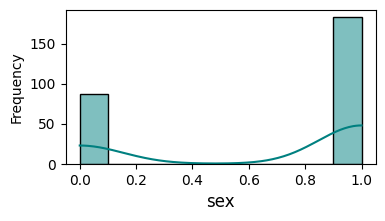

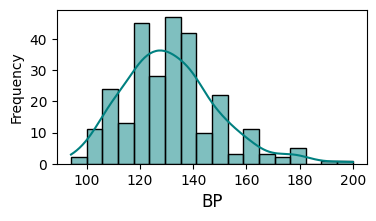

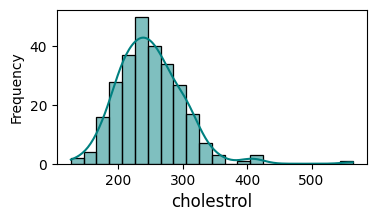

In [11]:
for col in first:
    plt.figure(figsize=(4, 2))
    sns.histplot(data[col], kde=True, color='teal')
    #plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=10)
    plt.show()

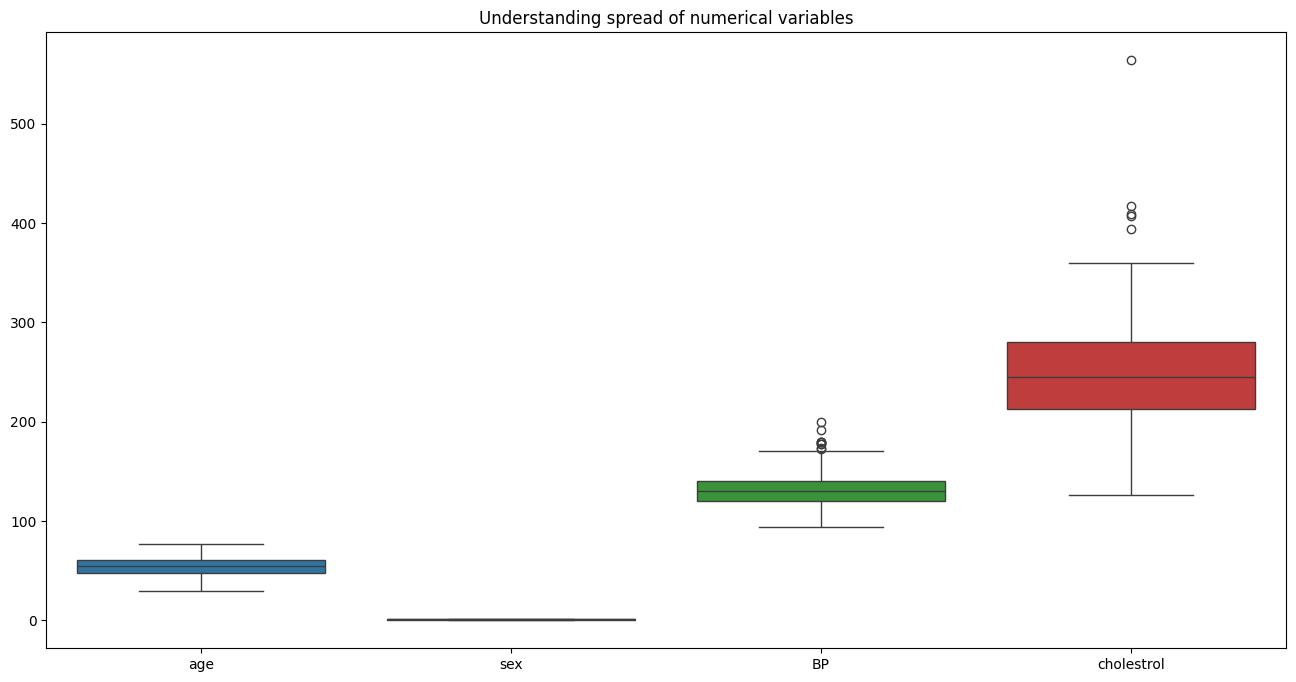

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data[first])
plt.title("Understanding spread of numerical variables")

plt.show()

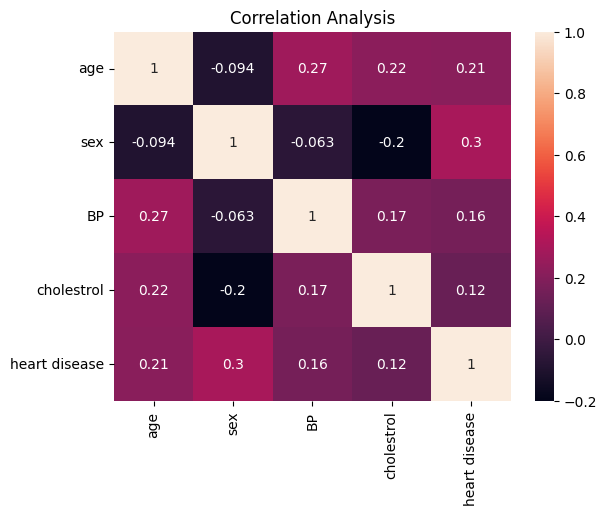

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Analysis")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop('heart disease', axis=1)
y = data['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

# First model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Create a Random Forest Classifier
rf_model_01 = RandomForestClassifier(n_estimators=10, random_state=42)

In [17]:
# Train the classifier
rf_model_01.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
# Make predictions on the test set
y_pred = rf_model_01.predict(X_test)

# Tree plot
Random forest works on several decision tree. Plotting them gives a hunch basically how a model predicts the value of a target variable by learning simple decision rules inferred from the data features.

Considering majority voting concept in random forest, we usually prefer more number of trees (even up to 200) to build random forest, hence it is almost impracticable to conceive all the decision trees. But visualizing any 2–3 trees picked randomly will gives fairly a good intuition of model learning.

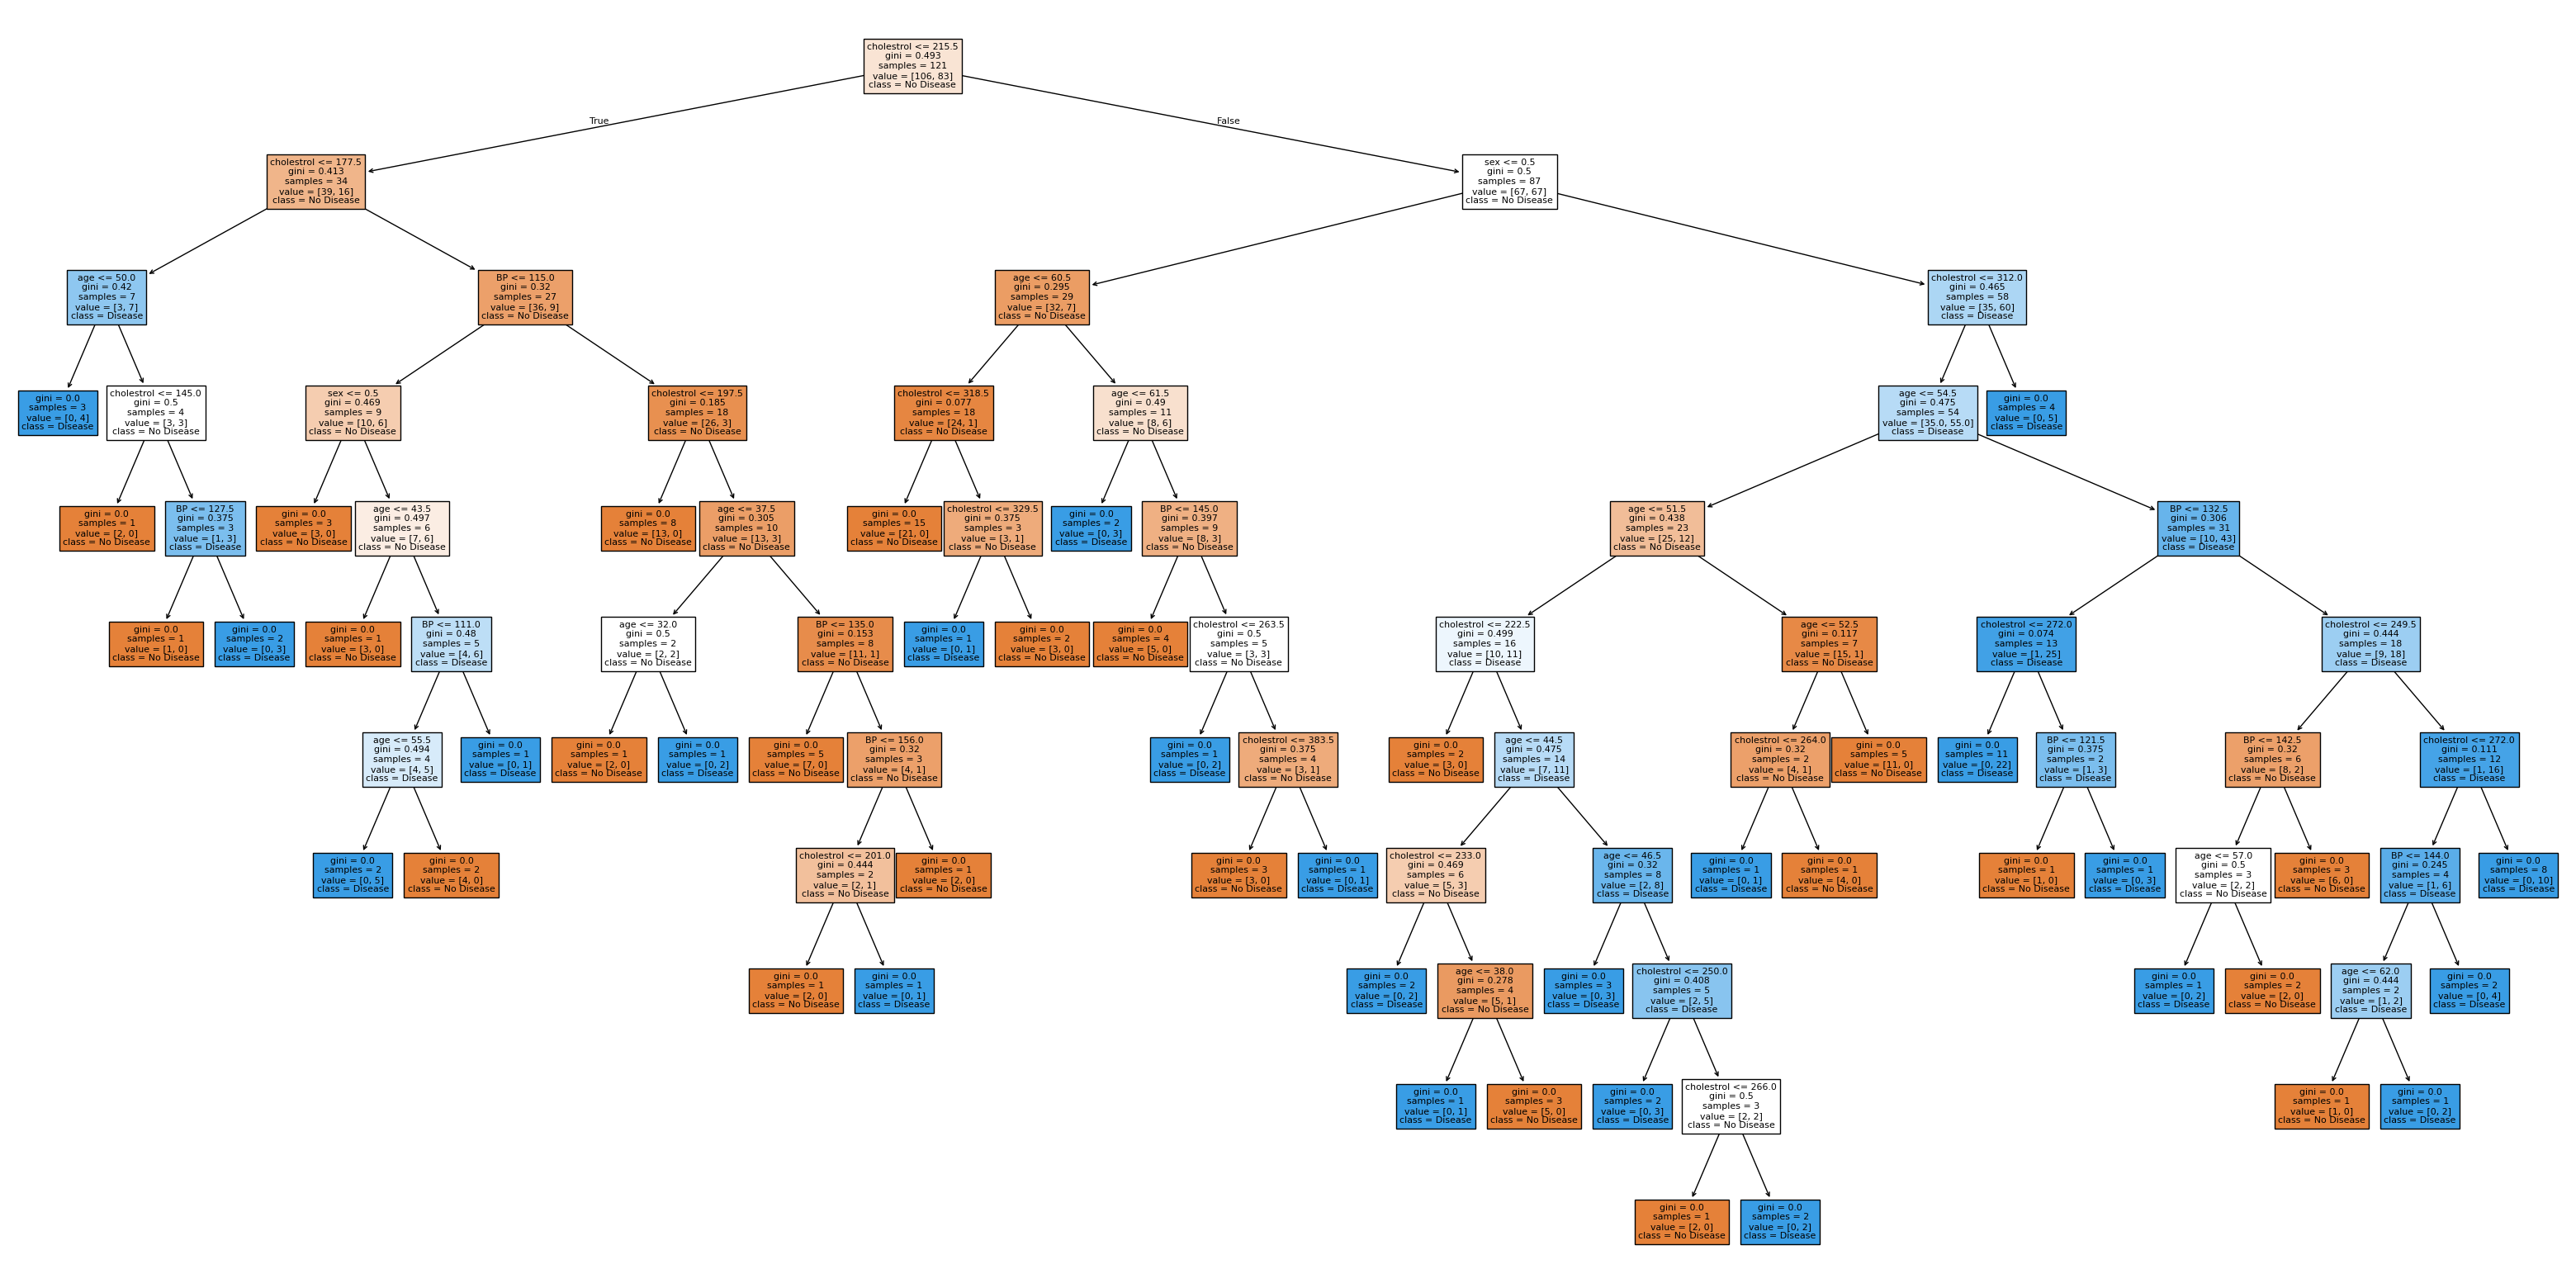

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(rf_model_01.estimators_[1], feature_names = X.columns,class_names=["No Disease",'Disease'],filled=True);

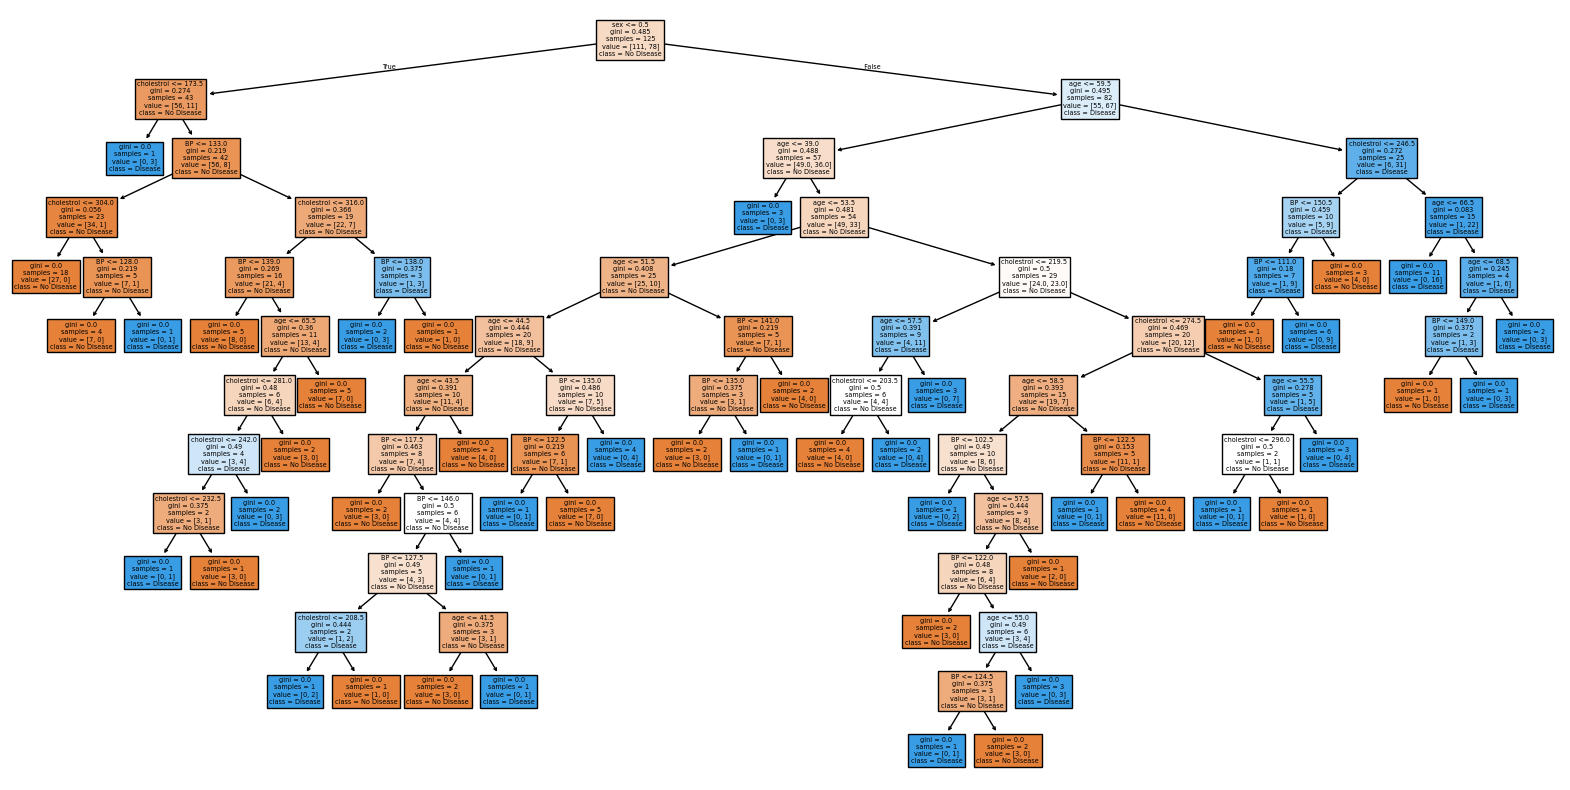

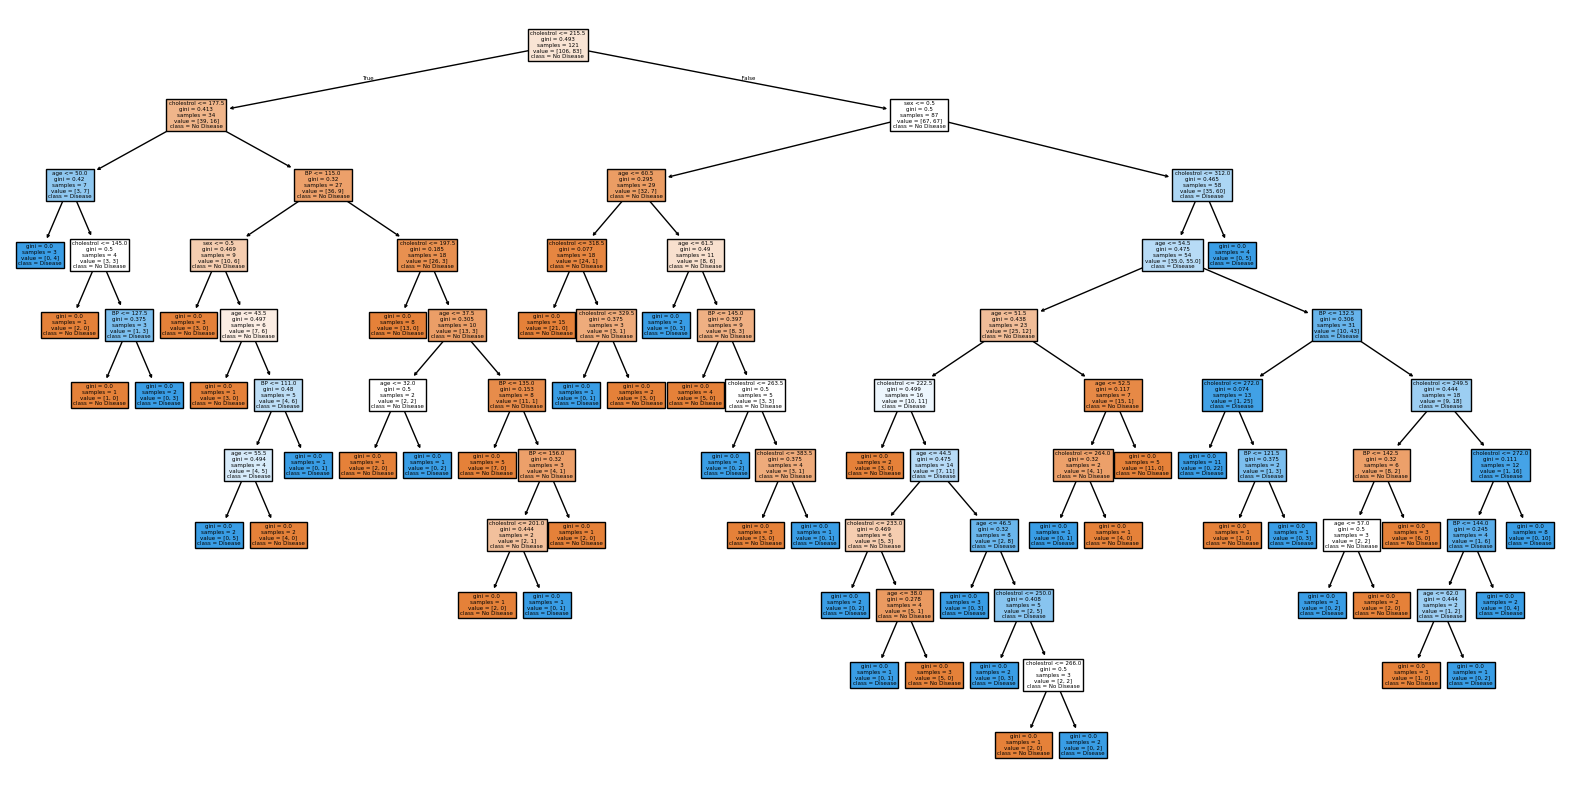

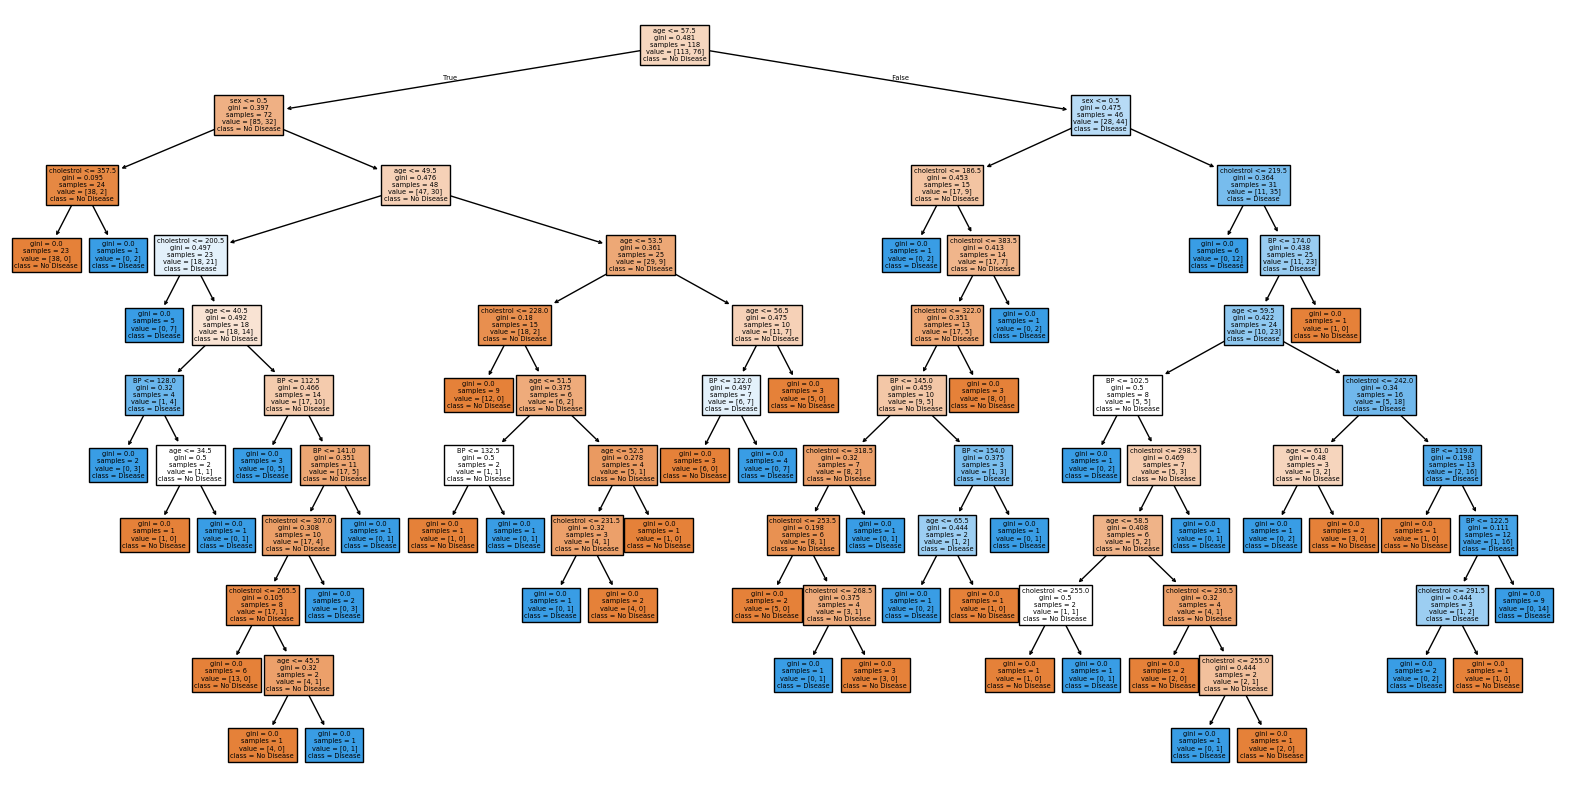

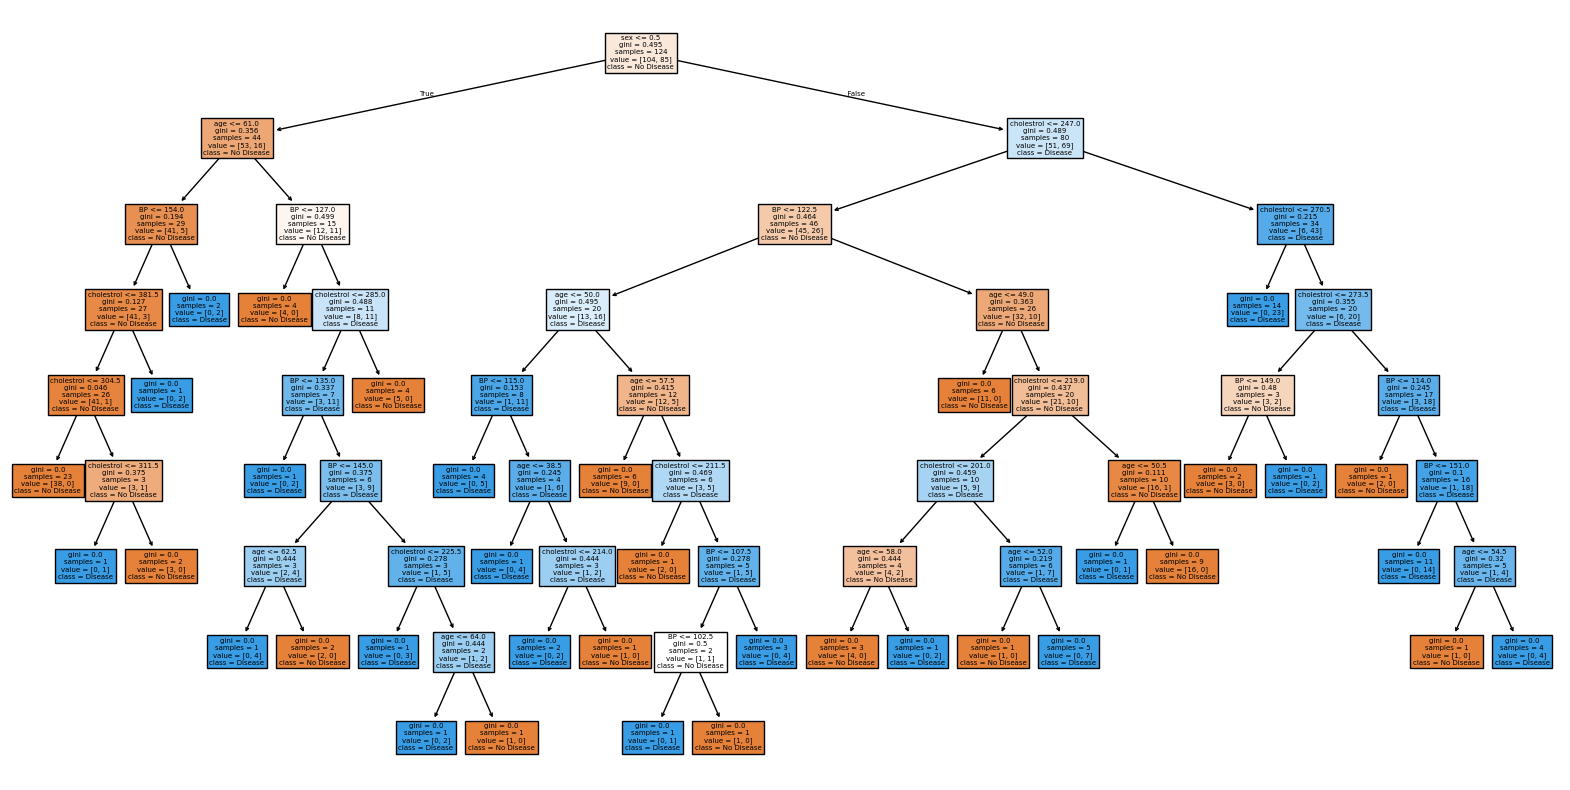

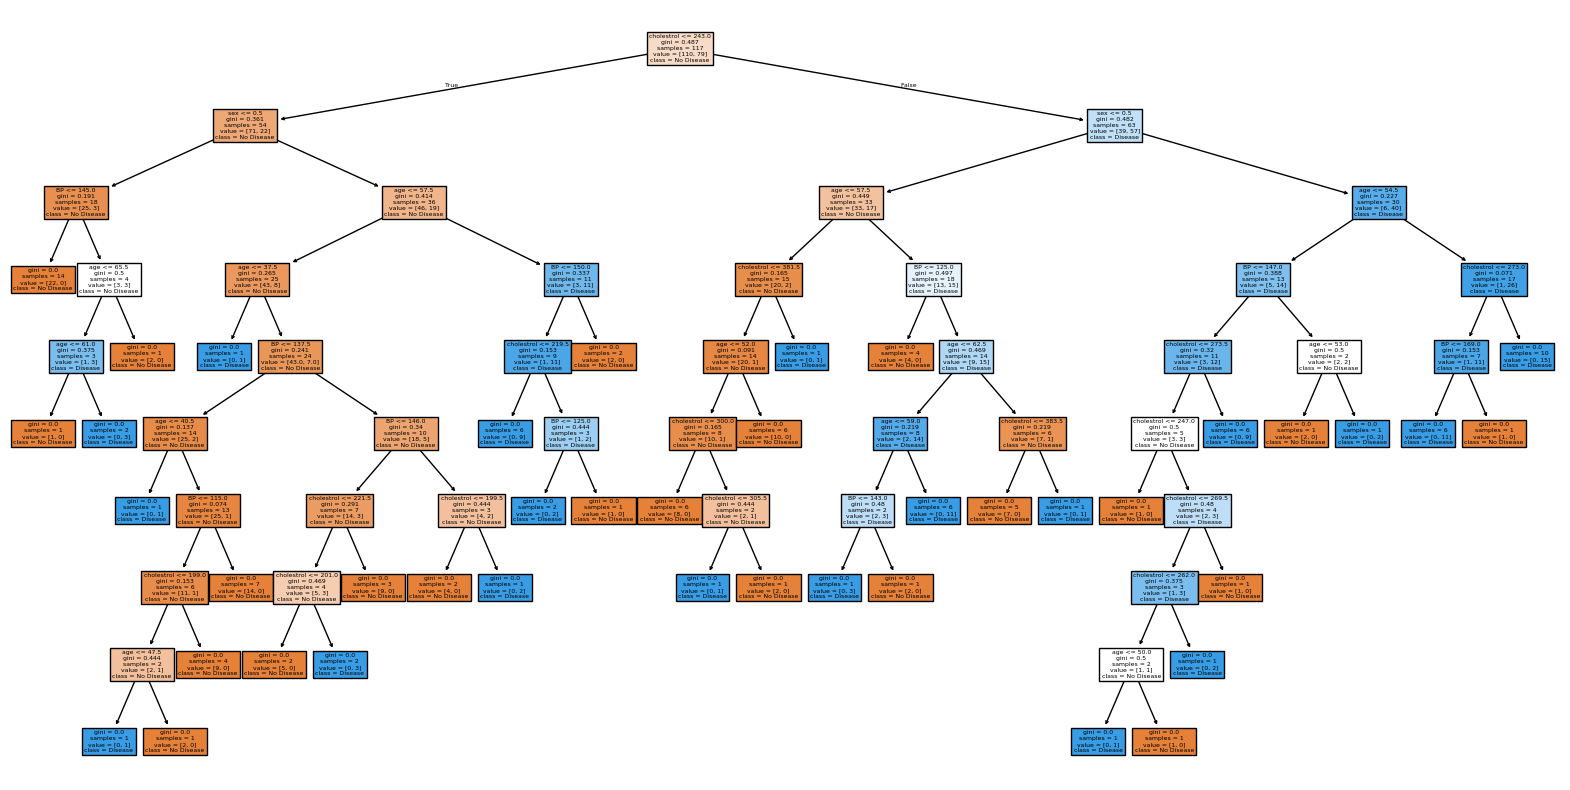

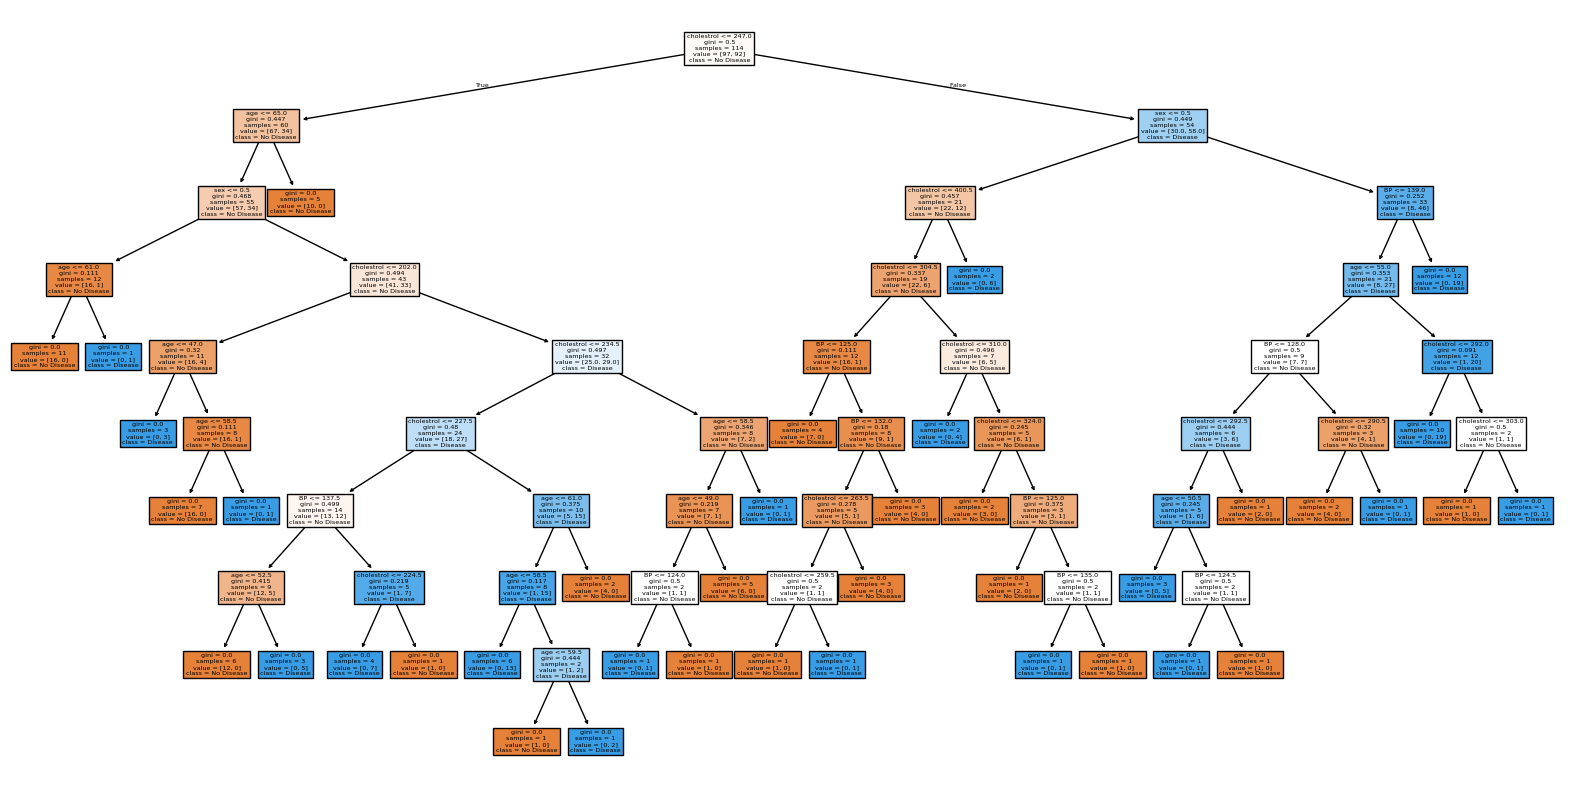

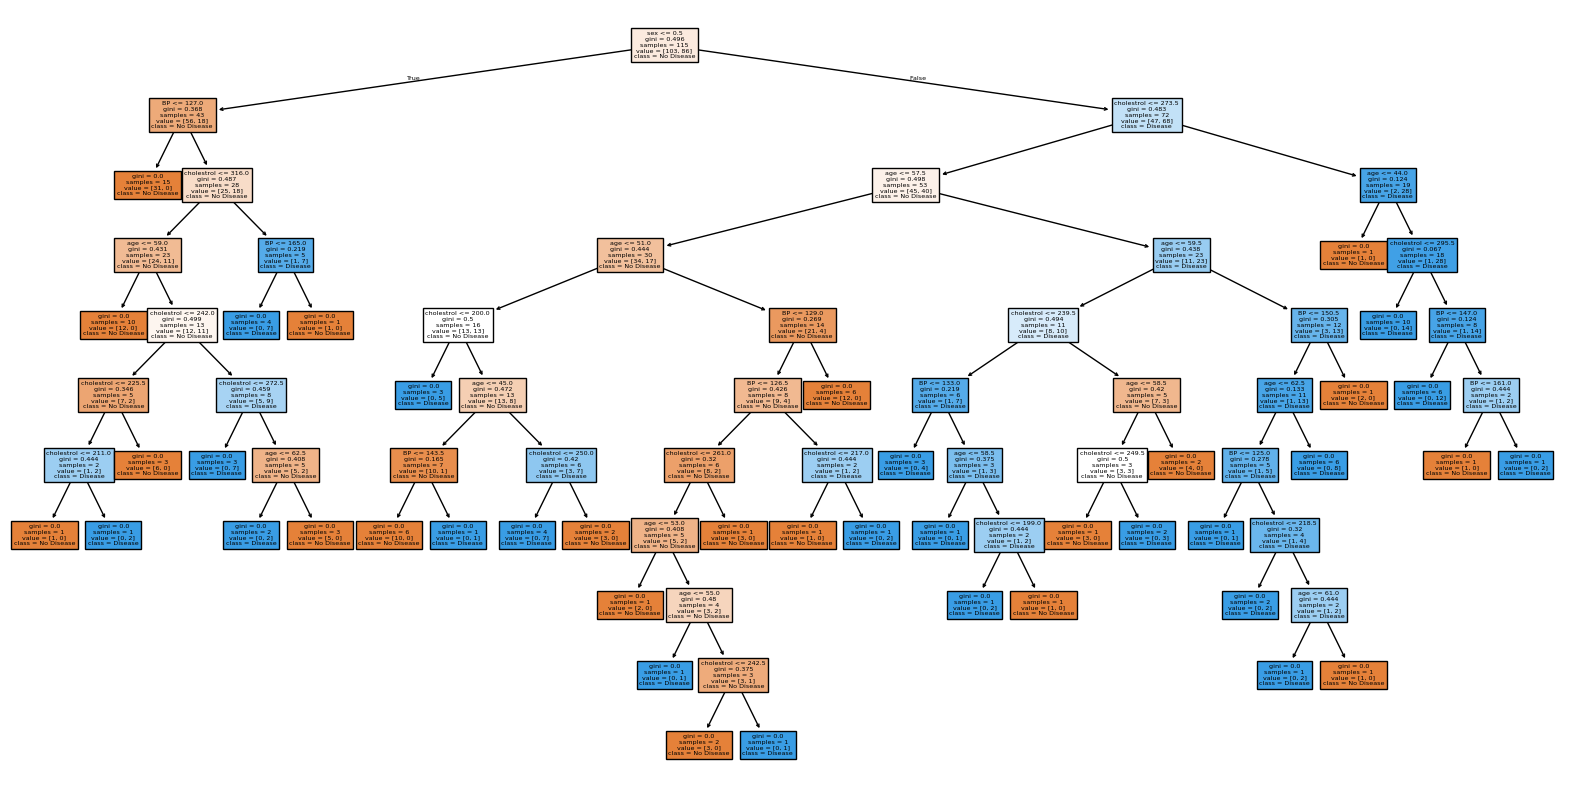

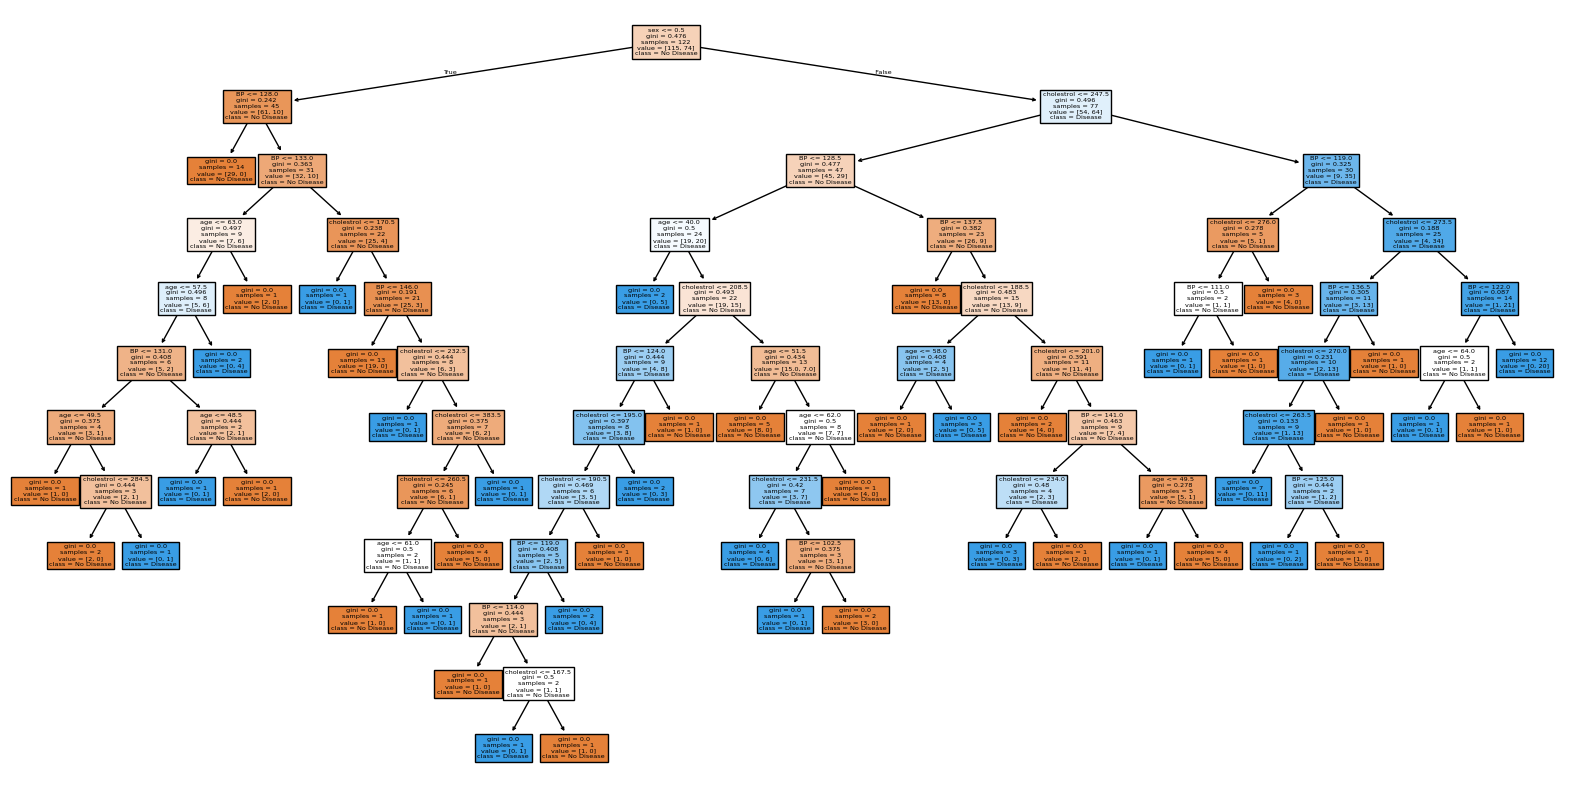

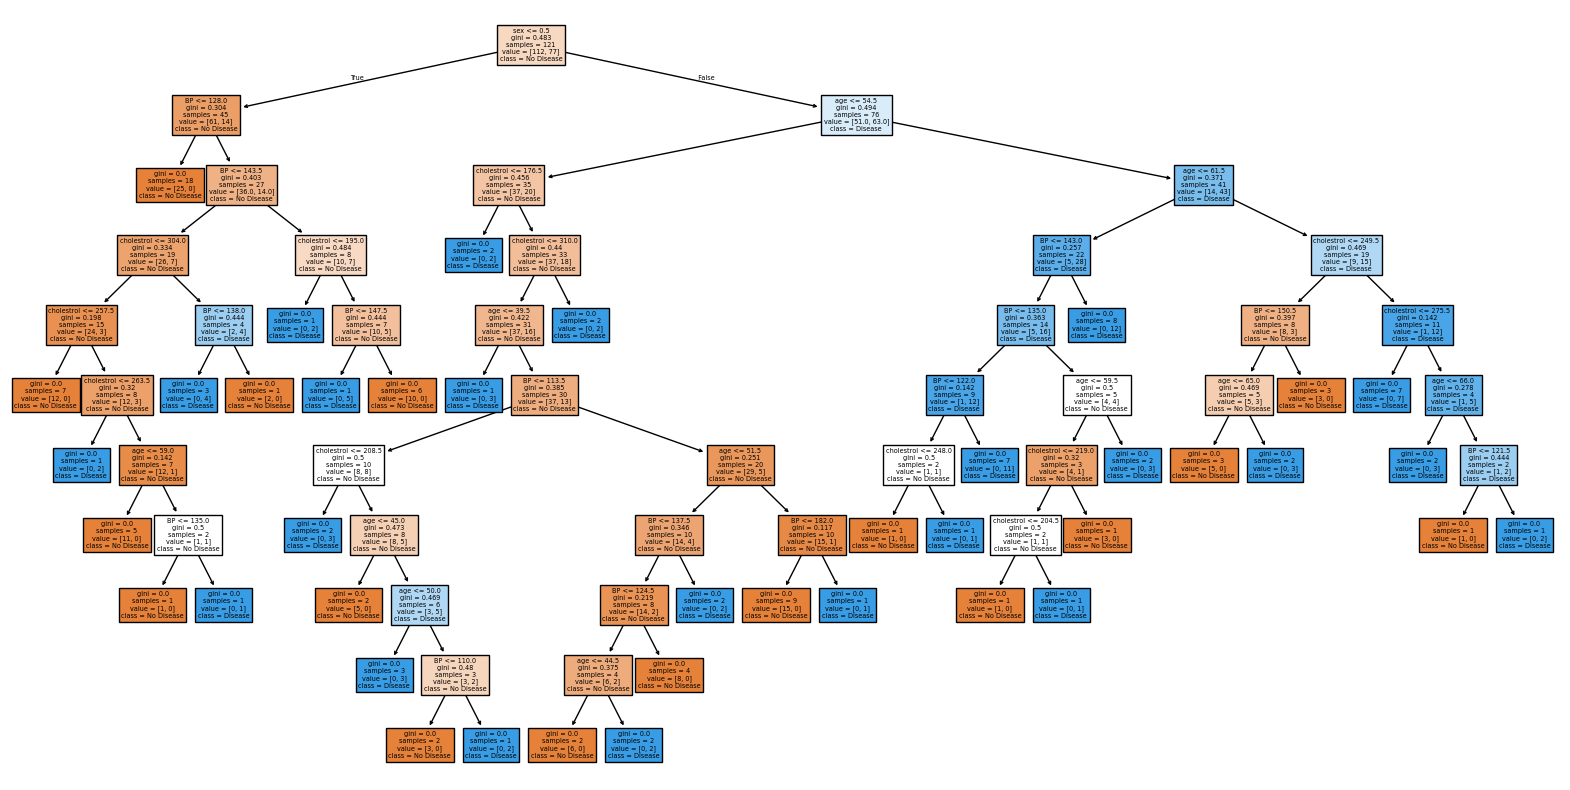

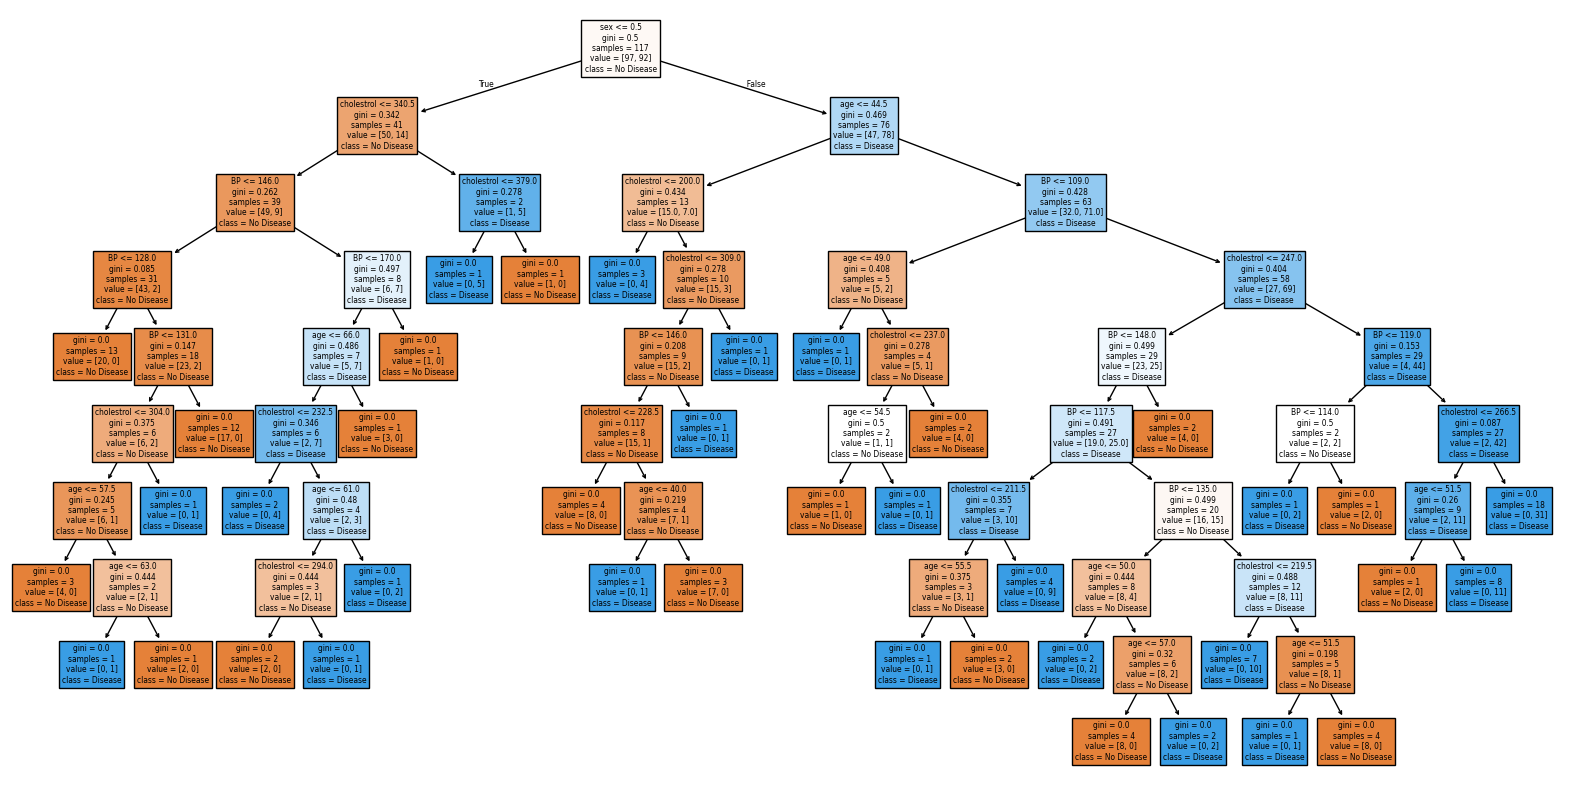

In [20]:
for i in range(0,10):
  plt.figure(figsize=(20,10))
  plot_tree(rf_model_01.estimators_[i], feature_names = X.columns,class_names=["No Disease",'Disease'],filled=True);

# Feature Importance in Random Forests
Variables with high importance are drivers of the outcome and their values have a significant impact on the outcome values. By contrast, variables with low importance might be omitted from a model, making it simpler and faster to fit and predict.

In [21]:
importances = rf_model_01.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
3,cholestrol,0.350614
0,age,0.300942
2,BP,0.210228
1,sex,0.138216


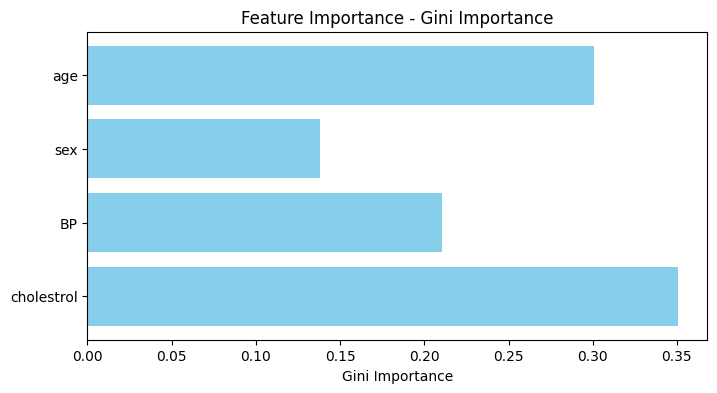

In [22]:
plt.figure(figsize=(8, 4))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Evaluate the model

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred )

array([[27, 18],
       [18, 18]])

In [24]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        45
           1       0.50      0.50      0.50        36

    accuracy                           0.56        81
   macro avg       0.55      0.55      0.55        81
weighted avg       0.56      0.56      0.56        81



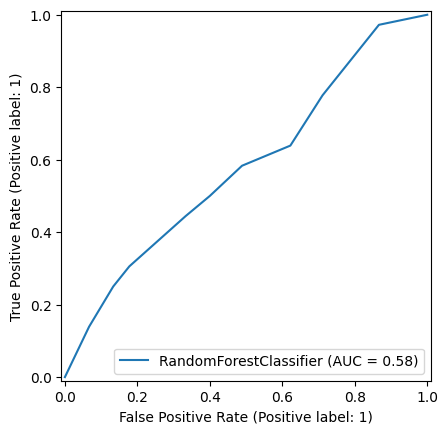

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf_model_01, X_test, y_test)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


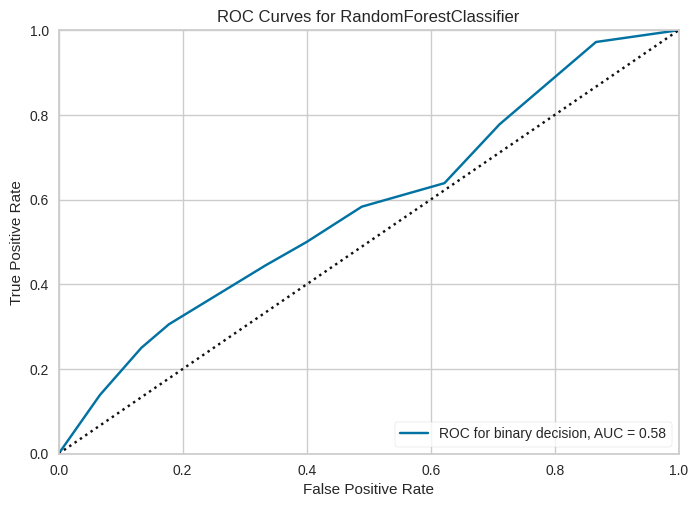

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [26]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(rf_model_01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [27]:
import numpy as np

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_model_01,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

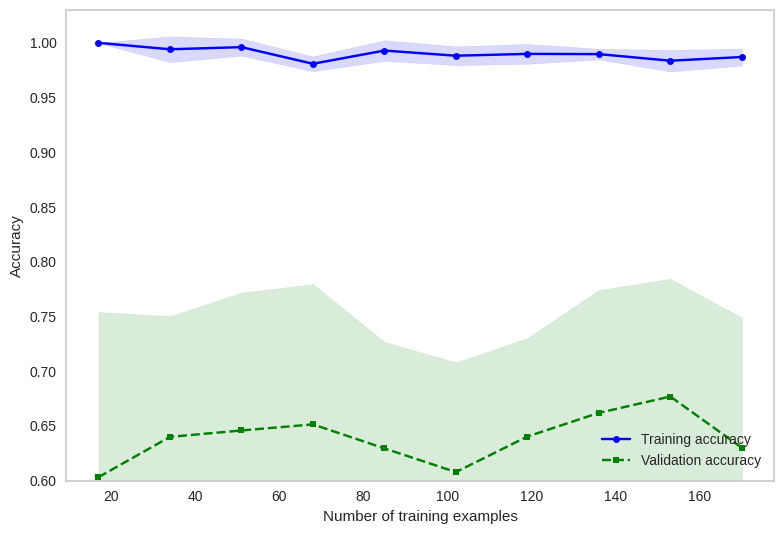

In [28]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.03])
plt.tight_layout()
plt.show()

In [29]:
rf_model_01.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Model2

In [30]:
rf_model_02 = RandomForestClassifier(random_state=42)
rf_model_02.fit(X_train,y_train)
y_pred = rf_model_02.predict(X_test)

In [31]:
rf_model_02.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
confusion_matrix(y_test, y_pred )

array([[30, 15],
       [16, 20]])

In [33]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6172839506172839

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66        45
           1       0.57      0.56      0.56        36

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.62      0.62      0.62        81



/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


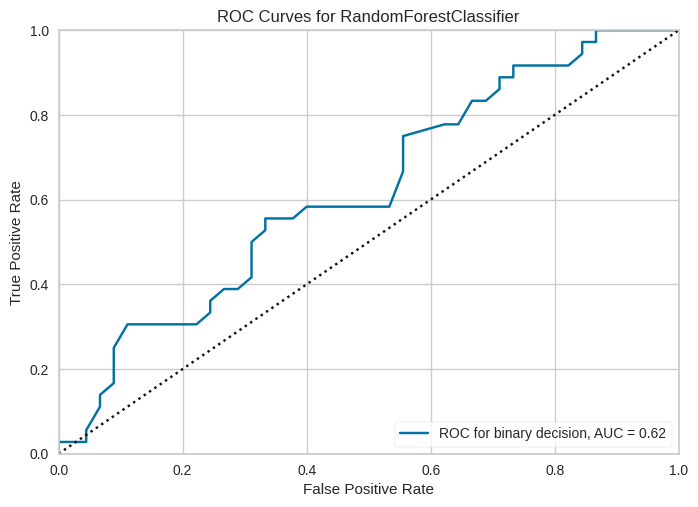

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [34]:
vis = ROCAUC(rf_model_02, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

# Hyperparameter Tuning
Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with **each** combination of values.

We tune some of the hyperparameters as below.
* max_depth : the maximum level of each tree. A deeper tree is more overfitted. So, a high value makes the model fail to generalize.
* n_estimators : the number of trees in the forest.
* max_features : the number of features. This is one of the main hyperparameters that prevents overfitting. The square root of the total number of features is recommended.
* min_samples_leaf : the minimum number of samples required to be at the leaf node of each tree.


verbose - controls the verbosity: the higher, the more messages.

In [35]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [1,3,5,10],
    'n_estimators': [10,50,100,200],
    'max_features': [1,2,3]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_model_01,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [36]:
grid_search.best_score_

np.float64(0.6773826458036984)

In [37]:
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

0.7248677248677249
0.6172839506172839


In [38]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 10,
 'n_estimators': 200}

In [39]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, max_features=3, min_samples_leaf=10,
                       n_estimators=200, random_state=42)

In [40]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

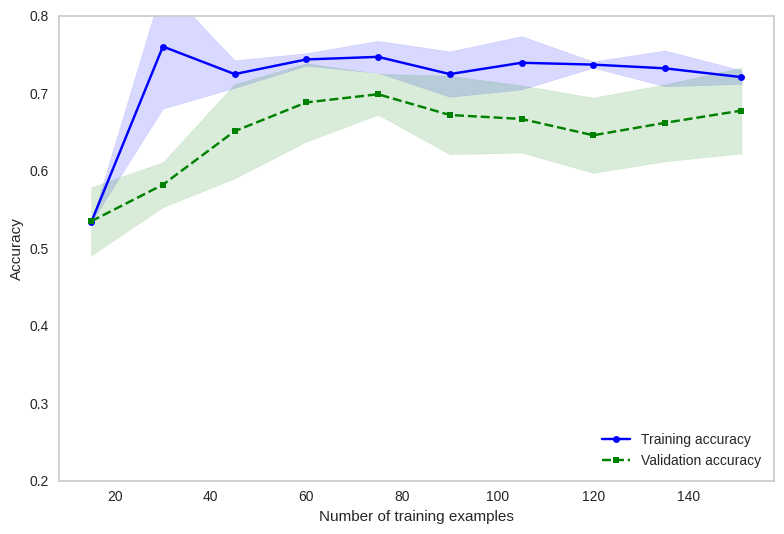

In [41]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 0.8])
plt.tight_layout()
plt.show()

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


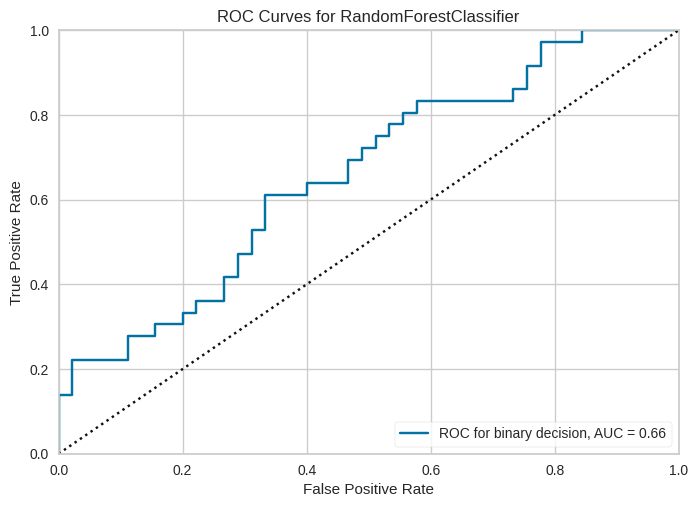

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
vis = ROCAUC(rf_best, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [43]:
from scipy.stats import randint

param_grid={'max_depth':[2,4],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,3),
         }

In [44]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rf_model_02,
                               param_distributions = param_grid,
                               scoring='accuracy',
                               n_jobs=-1, cv=5, verbose=2)
model_random = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=2, max_features=1, n_estimators=110; total time=   0.3s
[CV] END ......max_depth=2, max_features=1, n_estimators=110; total time=   0.3s
[CV] END ......max_depth=2, max_features=1, n_estimators=110; total time=   0.3s
[CV] END ......max_depth=2, max_features=1, n_estimators=110; total time=   0.3s
[CV] END ......max_depth=2, max_features=1, n_estimators=110; total time=   0.4s
[CV] END ......max_depth=4, max_features=2, n_estimators=210; total time=   0.5s
[CV] END ......max_depth=4, max_features=2, n_estimators=210; total time=   0.6s
[CV] END ......max_depth=4, max_features=2, n_estimators=210; total time=   0.7s
[CV] END ......max_depth=4, max_features=2, n_estimators=210; total time=   0.6s
[CV] END ......max_depth=4, max_features=2, n_estimators=210; total time=   0.7s
[CV] END ......max_depth=2, max_features=1, n_estimators=360; total time=   1.0s
[CV] END ......max_depth=2, max_features=1, n_es

In [45]:
model_random.best_params_

{'max_depth': 2, 'max_features': 2, 'n_estimators': np.int64(160)}

In [46]:
print(model_random.score(X_train,y_train))
print(model_random.score(X_test,y_test))

0.7195767195767195
0.6296296296296297
